In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [2]:
df_train = pd.read_csv(r'C:\Users\garga\3D Objects\ELL784 Assn\Assn1\train.csv')

In [3]:
df_train 

,x1,x2
0,-1.622420,726.595690
1,1.424165,-276.584355
2,0.709026,4.205381
3,1.175814,-5.317791
4,1.365642,-172.438086
...,...,...
65,0.382686,10.011479
66,0.703322,-4.842158
67,-0.733151,-22.416675
68,-1.403288,196.191585


In [4]:
df_test=pd.read_csv(r'C:\Users\garga\3D Objects\ELL784 Assn\Assn1\test.csv',header=None)

In [5]:
X_train=np.array(df_train.iloc[:,0])
y_train=np.array(df_train.iloc[:,1])
X_test=np.array(df_test.iloc[:,0])
y_test=np.array(df_test.iloc[:,1])
X_train_20=X_train[0:20]
y_train_20=y_train[0:20]
X_test_20=X_test[0:20]
y_test_20=y_test[0:20]
X_train_20.shape,y_train_20.shape

((20,), (20,))

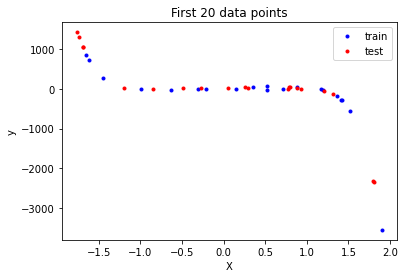

In [6]:
#Scatter plot of Train(blue) and Test(red) data

# plt.subplot(2, 1, 1)
plt.plot(X_train_20, y_train_20,'b.',label="train")
plt.plot(X_test_20,y_test_20,'r.',label="test")
plt.xlabel("X")
plt.ylabel("y")
plt.title("First 20 data points")
plt.legend()

# plt.subplot(2, 1, 2)
# plt.plot(X_train, y_train,'b.',label="train")
# plt.plot(X_test,y_test,'r.',label="test")
# plt.xlabel("X")
# plt.ylabel("y")
# plt.title("All data points")
# plt.legend()

plt.show()

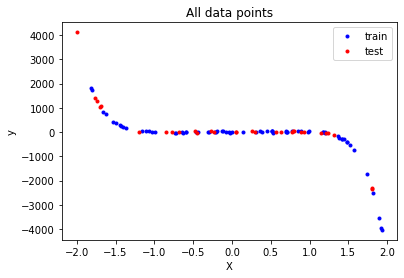

In [7]:
# plt.subplot(2, 1, 2)
plt.plot(X_train, y_train,'b.',label="train")
plt.plot(X_test,y_test,'r.',label="test")
plt.xlabel("X")
plt.ylabel("y")
plt.title("All data points")
plt.legend()

plt.show()

In [8]:
X_train_20=X_train_20.reshape(-1,1)
y_train_20=y_train_20.reshape(-1,1)
X_test_20=X_test_20.reshape(-1,1)
y_test_20=y_test_20.reshape(-1,1)


#### SGD regressor for training data and then calculating training error and test error

C:\Users\garga\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\garga\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


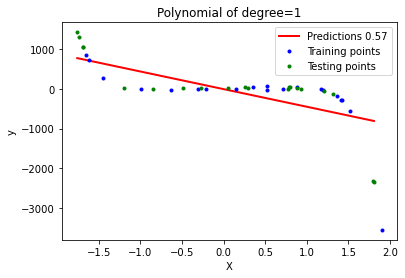

In [18]:
poly = PolynomialFeatures(degree=1)  #Degree of Polynomial fit
X_train_20_sort=np.sort(X_train_20)
X_train_20_trans = poly.fit_transform(X_train_20_sort)
X_test_20_trans = poly.transform(X_test_20)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_20_trans,y_train_20)

X_new_sort=np.sort(X_test_20.reshape(-1))
X_new_sort_=X_new_sort.reshape(X_test_20.shape)
X_new_poly = poly.transform(X_new_sort_)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_20_trans)

#plotting
X_new_=np.sort(X_test_20.reshape(-1))

plt.plot(X_new_, y_new, "r", linewidth=2, label="Predictions " + str(round(r2_score(y_test_20,y_pred),2)))
plt.plot(X_train_20, y_train_20, "b.",label='Training points')
plt.plot(X_test_20, y_test_20, "g.",label='Testing points')
plt.title("Polynomial of degree=1")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

C:\Users\garga\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\garga\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


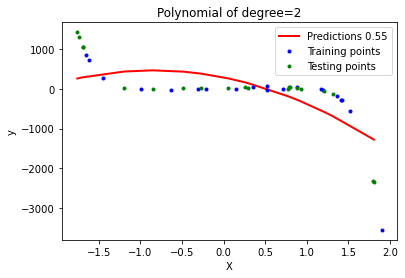

In [14]:
poly = PolynomialFeatures(degree=2)  #Degree of Polynomial fit
X_train_20_sort=np.sort(X_train_20)
X_train_20_trans = poly.fit_transform(X_train_20_sort)
X_test_20_trans = poly.transform(X_test_20)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_20_trans,y_train_20)

X_new_sort=np.sort(X_test_20.reshape(-1))
X_new_sort_=X_new_sort.reshape(X_test_20.shape)
X_new_poly = poly.transform(X_new_sort_)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_20_trans)

#plotting
X_new_=np.sort(X_test_20.reshape(-1))

plt.plot(X_new_, y_new, "r", linewidth=2, label="Predictions " + str(round(r2_score(y_test_20,y_pred),2)))
plt.plot(X_train_20, y_train_20, "b.",label='Training points')
plt.plot(X_test_20, y_test_20, "g.",label='Testing points')
plt.title("Polynomial of degree=2")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

C:\Users\garga\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\garga\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


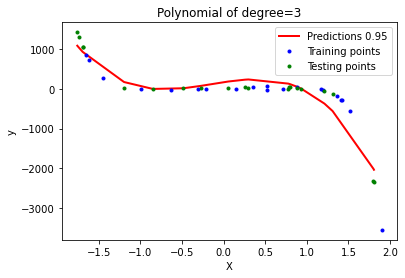

In [15]:
poly = PolynomialFeatures(degree=3)  #Degree of Polynomial fit
X_train_20_sort=np.sort(X_train_20)
X_train_20_trans = poly.fit_transform(X_train_20_sort)
X_test_20_trans = poly.transform(X_test_20)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_20_trans,y_train_20)

X_new_sort=np.sort(X_test_20.reshape(-1))
X_new_sort_=X_new_sort.reshape(X_test_20.shape)
X_new_poly = poly.transform(X_new_sort_)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_20_trans)

#plotting
X_new_=np.sort(X_test_20.reshape(-1))

plt.plot(X_new_, y_new, "r", linewidth=2, label="Predictions " + str(round(r2_score(y_test_20,y_pred),2)))
plt.plot(X_train_20, y_train_20, "b.",label='Training points')
plt.plot(X_test_20, y_test_20, "g.",label='Testing points')
plt.title("Polynomial of degree=3")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

C:\Users\garga\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


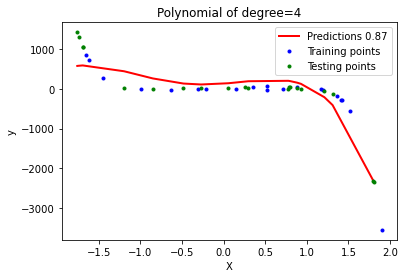

In [17]:
poly = PolynomialFeatures(degree=4)  #Degree of Polynomial fit
X_train_20_sort=np.sort(X_train_20)
X_train_20_trans = poly.fit_transform(X_train_20_sort)
X_test_20_trans = poly.transform(X_test_20)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_20_trans,y_train_20)

X_new_sort=np.sort(X_test_20.reshape(-1))
X_new_sort_=X_new_sort.reshape(X_test_20.shape)
X_new_poly = poly.transform(X_new_sort_)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_20_trans)

#plotting
X_new_=np.sort(X_test_20.reshape(-1))

plt.plot(X_new_, y_new, "r", linewidth=2, label="Predictions " + str(round(r2_score(y_test_20,y_pred),2)))
plt.plot(X_train_20, y_train_20, "b.",label='Training points')
plt.plot(X_test_20, y_test_20, "g.",label='Testing points')
plt.title("Polynomial of degree=4")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

C:\Users\garga\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


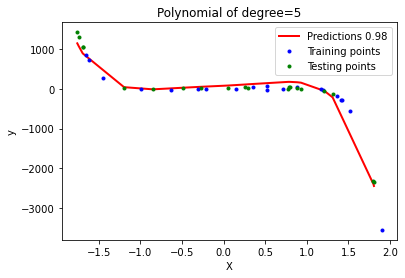

In [18]:
poly = PolynomialFeatures(degree=5)  #Degree of Polynomial fit
X_train_20_sort=np.sort(X_train_20)
X_train_20_trans = poly.fit_transform(X_train_20_sort)
X_test_20_trans = poly.transform(X_test_20)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_20_trans,y_train_20)

X_new_sort=np.sort(X_test_20.reshape(-1))
X_new_sort_=X_new_sort.reshape(X_test_20.shape)
X_new_poly = poly.transform(X_new_sort_)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_20_trans)

#plotting
X_new_=np.sort(X_test_20.reshape(-1))

plt.plot(X_new_, y_new, "r", linewidth=2, label="Predictions " + str(round(r2_score(y_test_20,y_pred),2)))
plt.plot(X_train_20, y_train_20, "b.",label='Training points')
plt.plot(X_test_20, y_test_20, "g.",label='Testing points')
plt.title("Polynomial of degree=5")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

C:\Users\garga\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


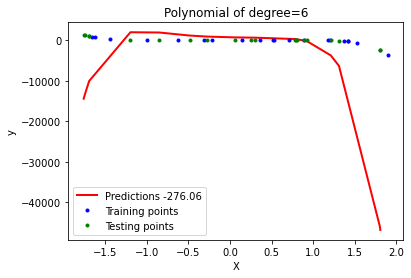

In [19]:
poly = PolynomialFeatures(degree=6)  #Degree of Polynomial fit
X_train_20_sort=np.sort(X_train_20)
X_train_20_trans = poly.fit_transform(X_train_20_sort)
X_test_20_trans = poly.transform(X_test_20)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_20_trans,y_train_20)

X_new_sort=np.sort(X_test_20.reshape(-1))
X_new_sort_=X_new_sort.reshape(X_test_20.shape)
X_new_poly = poly.transform(X_new_sort_)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_20_trans)

#plotting
X_new_=np.sort(X_test_20.reshape(-1))

plt.plot(X_new_, y_new, "r", linewidth=2, label="Predictions " + str(round(r2_score(y_test_20,y_pred),2)))
plt.plot(X_train_20, y_train_20, "b.",label='Training points')
plt.plot(X_test_20, y_test_20, "g.",label='Testing points')
plt.title("Polynomial of degree=6")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()